## Log viewer/editor
1. Wait for first image to be moved to run_folder.
2. Run the first cell and select watchfolder.
3. Run the second cell. 
4. Duplicate the third cell to create plots.
5. Re-select watchfolder in first cell when starting a new run.

In [1]:
import sys
enrico_path = r'D:\Fermidata1\enrico\\'
sys.path.insert(0,enrico_path)
from log_editor import *
display_qgrid_widgets()
from utility_functions import fancy_plot
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

FileChooser(path='D:\Fermidata1\enrico', filename='', title='HTML(value='', layout=Layout(display='none'))', s…

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<IPython.core.display.Javascript object>


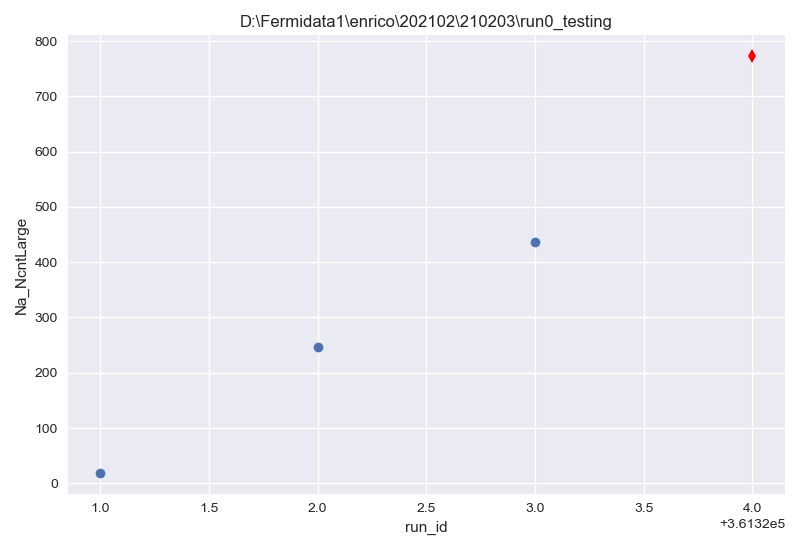

In [8]:
%matplotlib notebook
plt.style.use('seaborn')
    
def generate_subplots(watchfolder, 
                      ):
#generate subplot for each (x,y) pair
    x_params, y_params = xvars_display.options, yvars_display.options
    try:
        existing_df = generate_subplots.existing_df
    except:
        existing_df = None
    data = get_newest_df(watchfolder, existing_df = existing_df).query('badshot == False')
    data = get_newest_df(watchfolder).query('badshot == False')
    generate_subplots.existing_df = data.dropna() #quick and dirty way of not saving rows without analysis yet
#         """save the last df retrieved from breadboard to prevent spamming breadboard 
#         during long datasets"""
    for column in data.columns:
        if 'cnt' in column:
            data = data.query(column + ' > 0')
    data = data.sort_values(by='run_id', ascending=True)
    for i in range(len(x_params)):
        plt.subplot(len(x_params),1,i+1)
        x = data[x_params[i]]
        y = data[y_params[i]]
        plt.cla()
        fancy_plot(x, y, 'o')
        plt.xlabel(x_params[i])
        plt.ylabel(y_params[i])
        if i == 0:
            plt.title(watchfolder)
    plt.tight_layout()

def animate(i):
    if len(xvars_display.options) > 0:
        generate_subplots(watchfolder)
    #         plt.legend(loc='upper left')
        
    else:
        plt.plot(0,0)
        
# display(live_plot_HBox)
# watchfolder = filechooser_widget.selected_path
# # ani = FuncAnimation(plt.gcf(), animate, interval=5000)
# generate_subplots(watchfolder)

## Template for creating a new live plot

In [ ]:
display(live_plot_HBox)
watchfolder = filechooser_widget.selected_path
# ani = FuncAnimation(plt.gcf(), animate, interval=5000)
generate_subplots(watchfolder)

# Make your own custom plots
and annotate them in markup cells with $\LaTeX$

In [ ]:
#don't change this, watchfolder is selected with the directory widget above
watchfolder = filechooser_widget.selected_path

####################################################################################################
#USEFUL COMMANDS
#use this to get a dataframe for plotting
data = get_newest_df(watchfolder).query('badshot == False')

#SAVING FIGURES
# - static plots are saved within the notebook, e.g. below
# - export by right clicking and "save image as..." OR

#from python command
plt.savefig(fname) #fname is a path or name, e.g. run1_foo_spectra.png

In [ ]:
plt.plot([0,1],[0,1])

<IPython.core.display.Javascript object>


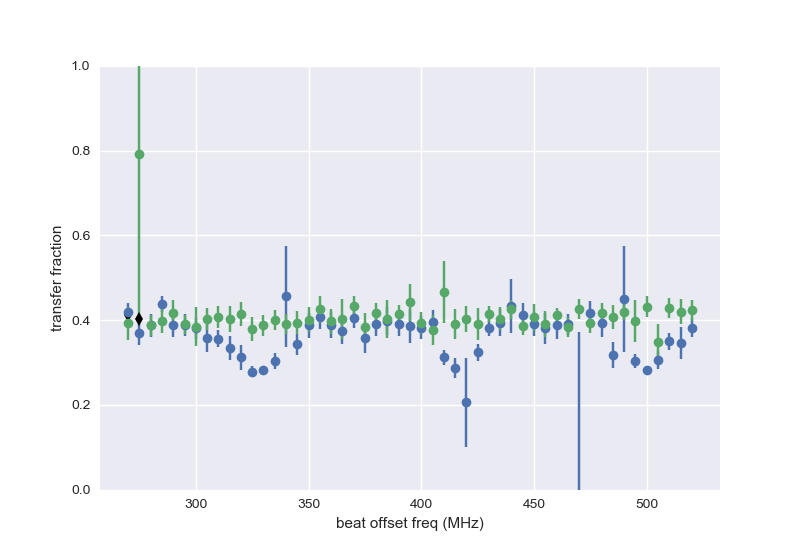

In [22]:
display(live_plot_HBox)
watchfolder = filechooser_widget.selected_path

%matplotlib notebook
plt.style.use('seaborn')
    
def generate_subplots(watchfolder, 
                      ):
#generate subplot for each (x,y) pair
    x_params, y_params = xvars_display.options, yvars_display.options
    try:
        existing_df = generate_subplots.existing_df
    except:
        existing_df = None
    data = get_newest_df(watchfolder, existing_df = existing_df).query('badshot == False')
#     data = get_newest_df(watchfolder).query('badshot == False')
    generate_subplots.existing_df = data.dropna()
#         """save the last df retrieved from breadboard to prevent spamming breadboard 
#         during long datasets"""
    data_PA = data.query('SeqMode == 1')
    data_noPA = data.query('SeqMode == 0')
    plt.cla()
    fancy_plot(data_PA['AOMPA'], data_PA['K1_bareNcntAverageMarqueeBoxValues']/
            (data_PA['K2_bareNcntAverageMarqueeBoxValues'] + 
             data_PA['K1_bareNcntAverageMarqueeBoxValues']),'o')
    fancy_plot(data_noPA['AOMPA'], data_noPA['K1_bareNcntAverageMarqueeBoxValues']/
            (data_noPA['K2_bareNcntAverageMarqueeBoxValues'] + 
             data_noPA['K1_bareNcntAverageMarqueeBoxValues']),'o')
    plt.xlabel('beat offset freq (MHz)')
    plt.ylabel('transfer fraction')
    plt.ylim([0,1])

# def animate(i):
#     if len(xvars_display.options) > 0:
#         generate_subplots(watchfolder)
#     #         plt.legend(loc='upper left')
        
#     else:
#         plt.plot(0,0)

# ani = FuncAnimation(plt.gcf(), animate, interval=5000)

generate_subplots(watchfolder)

## Curve Fitting
ex: Gaussian with constant offset

In [ ]:
from scipy.optimize import curve_fit
check_initial_guess = False

%matplotlib notebook
queries = ['badshot == False', 'K_bareNcntAverageMarqueeBoxValues > 0', 'Na_bareNcntAverageMarqueeBoxValues > 0']
for query in queries:
    df = df.query(query)
df = df.drop(columns = ['notes'])
df = df.dropna()
x_data, y_data = df['wavemeter_in_THz'], df['K_bareNcntAverageMarqueeBoxValues']
center_guess = x_data.mean()-120e-6
f = lambda freq, A, f_0, sigma, offset: A* np.exp(-((freq-f_0)/sigma)**2) + offset #gaussian with offset
p0 = [45, center_guess, 170e-6, 35]
lower_bounds = [0,center_guess - 500e-6,100e-6, 0]
upper_bounds = [100,center_guess + 500e-6,500e-6, 100]
plt.style.use('seaborn')
plt.plot(x_data, y_data,'o')
if check_initial_guess:
    plt.plot(x_data, f(x_data, *p0))
popt, pcov = curve_fit(f,x_data, y_data, p0 = p0,
                       bounds = (lower_bounds, upper_bounds))
x_fit = np.linspace(x_data.min(),x_data.max(),100)
y_fit = f(x_fit, *popt)
# plt.xlabel("wavemeter (GHz) + 516.47 THz")
# plt.ylabel("K counts")
plt.plot(x_fit, y_fit)
print(popt)